<a href="https://colab.research.google.com/github/Divyansh-Mehta/CSES-Probelm-Set/blob/master/sine_cosine_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import random
import math
import matplotlib.pyplot as plt

In [62]:
# The objective function (sphere function)
def objective_function(x1, x2):
    return 20 * x1 - 26 * x2 - 4 * x1 * x2 + 4 * x1**2 + 3 * x2**2

In [63]:
# Sine Cosine Algorithm
def sine_cosine_algorithm(obj_func, max_iter, a, n, lb, ub):
    population = [(random.uniform(lb, ub), random.uniform(lb, ub)) for _ in range(n)]

    best_fitness_history = []

    for iteration in range(max_iter):
        r1 = a - iteration * (a / max_iter)
        for i in range(n):
            j = i
            while j == i:
                j = random.randint(0, n - 1)

            # r1 = random.uniform(0, 1)
            r2 = random.uniform(0, 1)
            r3 = random.uniform(0, 1)
            r4 = random.uniform(0, 1)

            x_i_t, y_i_t = population[i]

            P_i_t = population[random.randint(0, n - 1)]

            if r4 < 0.5:
                x_i_t_plus_1 = x_i_t + r1 * math.sin(r2) * abs(r3 * P_i_t[0] - x_i_t)
                y_i_t_plus_1 = y_i_t + r1 * math.sin(r2) * abs(r3 * P_i_t[1] - y_i_t)
            else:
                x_i_t_plus_1 = x_i_t + r1 * math.cos(r2) * abs(r3 * P_i_t[0] - x_i_t)
                y_i_t_plus_1 = y_i_t + r1 * math.cos(r2) * abs(r3 * P_i_t[1] - y_i_t)

            x_i_t_plus_1 = max(min(x_i_t_plus_1, ub), lb)
            y_i_t_plus_1 = max(min(y_i_t_plus_1, ub), lb)

            fitness = obj_func(x_i_t_plus_1, y_i_t_plus_1)

            if fitness < obj_func(x_i_t, y_i_t):
                population[i] = (x_i_t_plus_1, y_i_t_plus_1)

        best_fitness = min(obj_func(x, y) for x, y in population)
        best_fitness_history.append(best_fitness)

    return best_fitness_history

In [67]:
#Defining algorithm parameters
max_iterations = 100
population_size = 20
lower_bound = -1.0
upper_bound = 1.0
a = 0.1

In [68]:
convergence_history = sine_cosine_algorithm(objective_function, max_iterations, a, population_size, lower_bound, upper_bound)

# Print the result
best_fitness = min(convergence_history)
print("Best Fitness:", best_fitness)

Best Fitness: -28.27669182082584


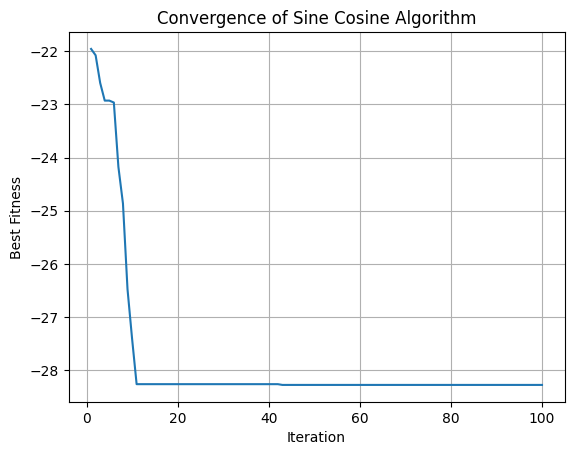

In [69]:
plt.plot(range(1, max_iterations + 1), convergence_history)
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.title("Convergence of Sine Cosine Algorithm")
plt.grid(True)
plt.show()